## **Visualizations for Phase 2**

### Visual 2:

Question: Are wildfires more common during certain times of the year? Can we predict wildfire location and severity based on the time of year?


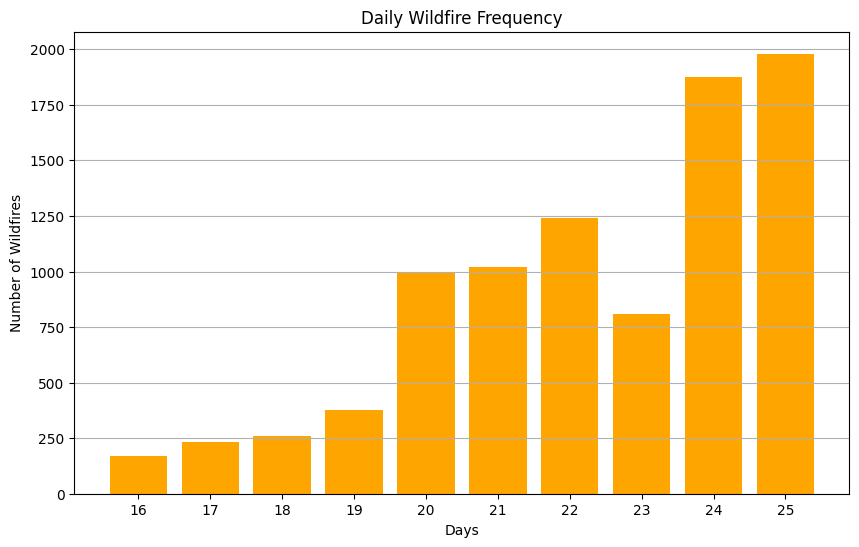

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

key = '996b2af0b72c07a0264d19e7d07e2bd5'

# last 10 days of all of mainland Europe (based on bounding region coordinates 36,-10,40,71)
area_url = f'https://firms.modaps.eosdis.nasa.gov/api/area/csv/{key}/VIIRS_NOAA20_NRT/36,-10,40,71/10'
df_area = pd.read_csv(area_url)

# acquisition date to datetime format
df_area['acq_date'] = pd.to_datetime(df_area['acq_date'])

# extracts the day from the acquisition date
df_area['day'] = df_area['acq_date'].dt.day

# count occurrences per day
daily_fire_counts = df_area['day'].value_counts().sort_index()

# Bar chart of monthly wildfire frequency
plt.figure(figsize=(10, 6))
plt.bar(daily_fire_counts.index, daily_fire_counts.values, color='orange')
plt.title('Daily Wildfire Frequency')
plt.xlabel('Days')
plt.ylabel('Number of Wildfires')
plt.xticks(daily_fire_counts.index)
plt.grid(axis='y')
plt.show()